## JAGRITI PRAKASH

# THE SPARKS FOUNDATION GRIP INTERNSHIP

## Prediction using Supervised ML

#### Problem: Predict the percentage of marks of an student based on the number of study hours.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the required Data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Dataset Imported and Displayed")

s_data.head(16)

Dataset Imported and Displayed


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Preprocessing

In [3]:
#finding length of dataset
len(s_data)

25

In [4]:
#info
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#checking for null values
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization & Exploration

Text(0, 0.5, 'Percentage Score')

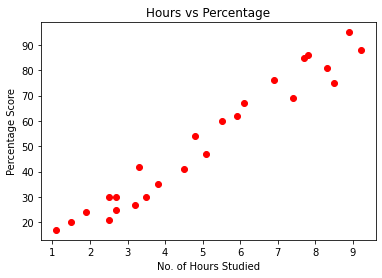

In [7]:
#plotting using matplotlib
##plt scatter
plt.scatter(x = s_data['Hours'], y= s_data['Scores'], c = 'r')
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Let us visualize the dataset further

In [8]:
x = s_data['Hours']
y = s_data['Scores']

Text(0, 0.5, 'Percentage Score')

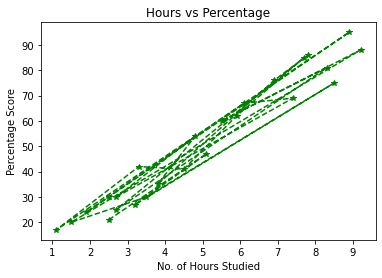

In [9]:
#plt plot
plt.plot(x, y, 'g*--')
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

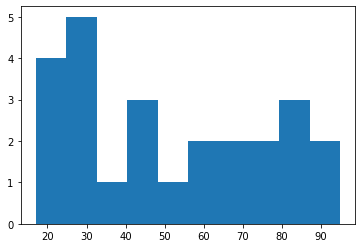

In [10]:
#plotting histogram
plt.hist(s_data.Scores)

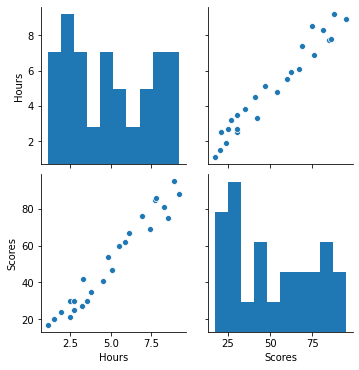

In [11]:
#pairplotting
sns.pairplot(s_data)

In [12]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Model Training

####  Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [14]:
#Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [15]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

In [16]:
print(X_test) 
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


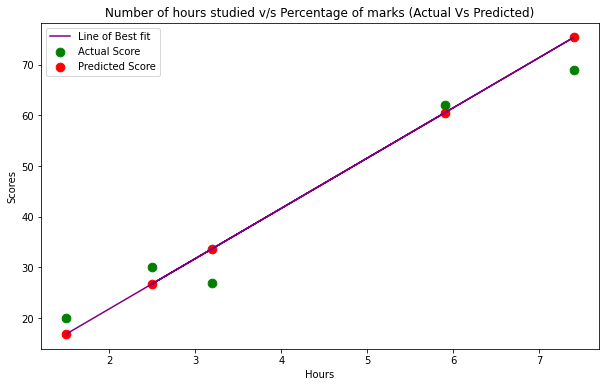

In [17]:
#visualization plot
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test,color='green',s=75,label='Actual Score')
plt.scatter(X_test,y_pred,color='red',s=75,label='Predicted Score')
plt.plot(X_test,y_pred,color='purple',label='Line of Best fit')
plt.title('Number of hours studied v/s Percentage of marks (Actual Vs Predicted)')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.legend()
plt.show()

In [18]:
error=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Absolute Error': abs(y_test-y_pred)})
error

,Actual,Predicted,Absolute Error
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


## Model Evaluation

In [19]:
#finding the Root Mean Squared Error(RMSE) 
from sklearn.metrics import mean_squared_error

In [20]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE = ",rmse)

RMSE =  4.6474476121003665


In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [22]:
hours = np.array([9.61]).reshape(-1,1)
my_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(np.round(my_pred[0],2)))

No of Hours = [[9.61]]
Predicted Score = 97.26
